In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="

In [5]:
#cities_test = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]
city_name = []
city_temp = []
city_wind = []
city_clouds = []
city_humidity = []
city_lat = []
city_lng = []
city_country = []
count  = 0
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        weather_response = requests.get(query_url + city +"&units=imperial").json()
        city_name.append(weather_response["name"])
        city_temp.append(weather_response['main']['temp'])
        city_wind.append(weather_response['wind']['speed'])
        city_humidity.append(weather_response['main']['humidity'])
        city_clouds.append(weather_response['clouds']['all'])
        city_lat.append(weather_response['coord']['lat'])
        city_lng.append(weather_response['coord']['lon'])
        city_country.append(weather_response["sys"]["country"])
        print(f'Processing Record [{weather_response["name"]}]')
    except KeyError:
        print("city not found...skipping")
    count += 1
    if count == 499 :
        time.sleep(60)
        count = 0

print("----------------------------------\nDone")

Processing Record [Yunhe]
Processing Record [Inhambane]
Processing Record [Makkah al Mukarramah]
Processing Record [Punta Arenas]
Processing Record [Port Macquarie]
Processing Record [Castro]
Processing Record [Barrow]
Processing Record [Airai]
city not found...skipping
Processing Record [Port Alfred]
Processing Record [Belfast]
Processing Record [Waupun]
Processing Record [Jamestown]
city not found...skipping
Processing Record [Bambous Virieux]
Processing Record [Tual]
Processing Record [Klaksvík]
Processing Record [Torbay]
Processing Record [Bluff]
Processing Record [Muroto-misakicho]
Processing Record [Vung Tau]
Processing Record [Nabire]
Processing Record [Yellowknife]
Processing Record [Najrān]
Processing Record [Pervomayskoye]
Processing Record [Sokol]
Processing Record [Hilo]
Processing Record [Nanortalik]
Processing Record [Prince Rupert]
Processing Record [Imeni Vorovskogo]
Processing Record [Rocha]
Processing Record [Palmer]
city not found...skipping
Processing Record [Salala

Processing Record [Port Elizabeth]
Processing Record [Nikolskoye]
Processing Record [Bandarbeyla]
city not found...skipping
Processing Record [Mahanoro]
city not found...skipping
city not found...skipping
Processing Record [Paamiut]
Processing Record [Itanhaém]
Processing Record [Sur]
Processing Record [Giohar]
Processing Record [Cabo San Lucas]
Processing Record [Saldanha]
Processing Record [Oktyabr'skiy]
Processing Record [Rehoboth]
Processing Record [Beausejour]
Processing Record [Fairbanks]
Processing Record [Okhotsk]
Processing Record [Smolenka]
Processing Record [Talcahuano]
Processing Record [Durango]
Processing Record [Jardim]
Processing Record [Carballo]
Processing Record [Tétouan]
Processing Record [Camacha]
Processing Record [Usisha]
Processing Record [Marsá Maţrūḩ]
city not found...skipping
Processing Record [Cidreira]
Processing Record [Calbuco]
Processing Record [Brownwood]
Processing Record [Alofi]
Processing Record [Poum]
Processing Record [Beloha]
Processing Record [Hu

Processing Record [Tigre]
Processing Record [Malinovoye Ozero]
Processing Record [Murillo]
Processing Record [Yar-Sale]
Processing Record [Batagay-Alyta]
Processing Record [Northam]
Processing Record [Boshnyakovo]
city not found...skipping
Processing Record [Kyra]
Processing Record [Finsterwalde]
Processing Record [Brae]
Processing Record [Muros]
Processing Record [Okato]
Processing Record [Vila]
Processing Record [Acapulco de Juárez]
Processing Record [Banamba]
city not found...skipping
Processing Record [Sola]
Processing Record [Kodra]
Processing Record [Osypenko]
Processing Record [San Jose]
Processing Record [Carutapera]
Processing Record [Mt. Pleasant]
Processing Record [São João da Barra]
Processing Record [Babino]
Processing Record [Soria]
----------------------------------
Done


In [6]:
#putting the lists into a dictionary
weather_dict = {
    "City": city_name,
    "Lat": city_lat,
    "Long": city_lng,
    "Max Temp": city_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country
    
}
#creating the dataframe from the weather dictionary and checking to make sure we have 500+ cities
weather_df= pd.DataFrame(weather_dict)
weather_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,19.980441,22.225533,68.695460,71.496324,51.784926,7.757721
std,33.765275,91.720009,12.725915,20.173100,40.063298,5.368863
min,-54.800000,-179.170000,33.800000,2.000000,0.000000,0.160000
25%,-8.497500,-57.815000,59.447500,61.000000,3.000000,3.415000
50%,22.840000,25.270000,69.905000,76.000000,58.000000,6.610000
75%,49.110000,107.177500,78.677500,87.000000,92.000000,11.165000
max,78.220000,179.320000,105.840000,100.000000,100.000000,28.790000


In [7]:
#writing CSV file to the output_data folder
weather_df.to_csv('output_data/weather_info.csv', index = False)

In [8]:
#humidity_sort = weather_df.sort_vales(by =['Humidity'])
#humidity_sort
weather_df2 = weather_df.sort_values(by = ['Humidity'])

In [9]:
weather_df2

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country
129,Elko,41.00,-115.50,95.43,2,0,4.00,US
205,Kaeo,-35.10,173.78,57.99,3,100,11.99,NZ
341,Okaihau,-35.32,173.78,57.99,3,100,11.99,NZ
64,Saint George,37.10,-113.58,105.84,9,1,16.11,US
297,Port Hedland,-20.32,118.57,80.60,10,0,6.93,AU
...,...,...,...,...,...,...,...,...
417,Ancud,-41.87,-73.82,46.18,100,90,12.75,CL
49,Hambantota,6.12,81.12,77.00,100,40,6.93,LK
296,Faya,18.39,42.45,63.50,100,40,5.48,SA
262,Port Elizabeth,-33.92,25.57,48.20,100,0,4.70,ZA


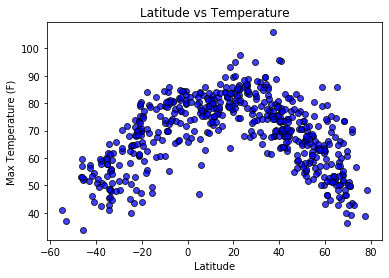

In [10]:
#Latitude vs Temperature Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.75)
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.savefig('output_data/Latitude_vs_Temp')

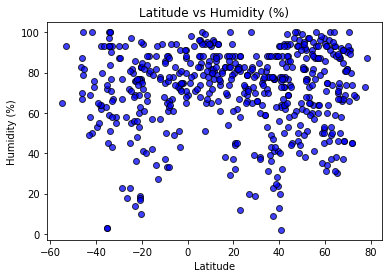

In [11]:
#Latitude vs Humidity Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.75)
plt.title("Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.savefig('output_data/Latitude_vs_Humidity')

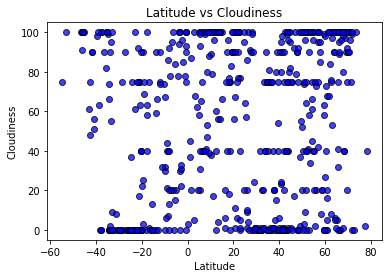

In [12]:
#Latitude vs Cloudiness Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.75)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]
plt.savefig('output_data/Latitude_vs_Cloudiness')

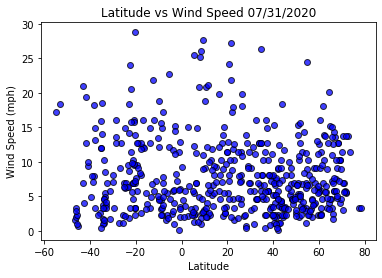

In [14]:
#Latitude vs Wind Speed Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.75)
plt.title("Latitude vs Wind Speed 07/31/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]
plt.savefig('output_data/Latitude_vs_WindSpeed')

In [15]:
#separating by hemisphere
n_hemi = weather_df[weather_df ["Lat"]>= 0]
s_hemi = weather_df[weather_df ["Lat"]<0]

In [16]:
#linear regression function
def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue,stderr) = linregress(x,y) 
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2))+ "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

The r-squared is: 0.445698431255572


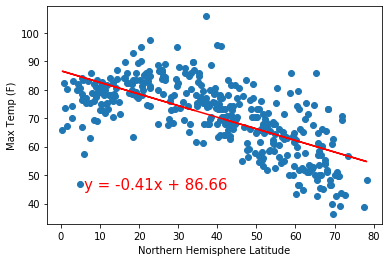

In [17]:
#northern hemisphere- max temp vs latitude linear regression
x_values = n_hemi["Lat"]
y_values = n_hemi["Max Temp"]
reg, lin_eq, rvalue = lin_reg(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, reg, "r-")
plt.annotate(lin_eq,(6,45),fontsize= 15, color = "red")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Max Temp (F)")
print("The r-squared is: " + str(rvalue**2))
plt.savefig('output_data/N_Latitude_vs_Temp')
plt.show()

The r-squared is: 0.5692562890404165


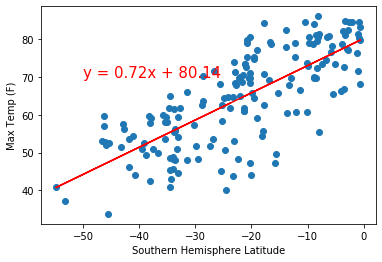

In [20]:
#southern hemisphere- max temp vs latitude linear regression
x_values = s_hemi["Lat"]
y_values = s_hemi["Max Temp"]
reg, lin_eq, rvalue = lin_reg(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, reg, "r-")
plt.annotate(lin_eq,(-50,70),fontsize= 15, color = "red")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Max Temp (F)")
print("The r-squared is: " + str(rvalue**2))
plt.savefig('output_data/S_Latitude_vs_Temp')
plt.show()

The r-squared is: 0.009608507631816421


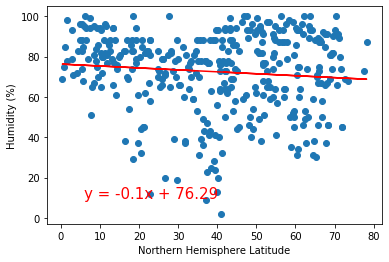

In [21]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = n_hemi["Lat"]
y_values = n_hemi["Humidity"]
reg, lin_eq, rvalue = lin_reg(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, reg, "r-")
plt.annotate(lin_eq,(6,10),fontsize= 15, color = "red")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Humidity (%)")
print("The r-squared is: " + str(rvalue**2))
plt.savefig('output_data/N_Latitude_vs_Humidity')
plt.show()

The r-squared is: 5.4703165430633976e-05


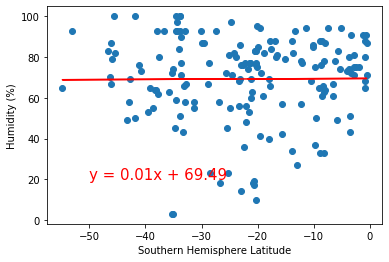

In [22]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = s_hemi["Lat"]
y_values = s_hemi["Humidity"]
reg, lin_eq, rvalue = lin_reg(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, reg, "r-")
plt.annotate(lin_eq,(-50,20),fontsize= 15, color = "red")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Humidity (%)")
print("The r-squared is: " + str(rvalue**2))
plt.savefig('output_data/S_Latitude_vs_Humidity')
plt.show()

The r-squared is: 1.8072785805967804e-05


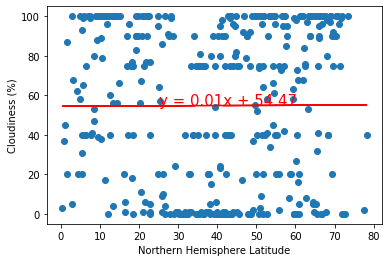

In [23]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = n_hemi["Lat"]
y_values = n_hemi["Cloudiness"]
reg, lin_eq, rvalue = lin_reg(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, reg, "r-")
plt.annotate(lin_eq,(25,55),fontsize= 15, color = "red")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Cloudiness (%)")
print("The r-squared is: " + str(rvalue**2))
plt.savefig('output_data/N_Latitude_vs_Cloudiness')
plt.show()

The r-squared is: 0.004703805548270668


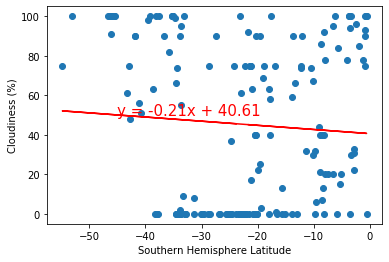

In [24]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = s_hemi["Lat"]
y_values = s_hemi["Cloudiness"]
reg, lin_eq, rvalue = lin_reg(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, reg, "r-")
plt.annotate(lin_eq,(-45,50),fontsize= 15, color = "red")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Cloudiness (%)")
print("The r-squared is: " + str(rvalue**2))
plt.savefig('output_data/S_Latitude_vs_Cloudiness')
plt.show()

The r-squared is: 0.0045251745908932986


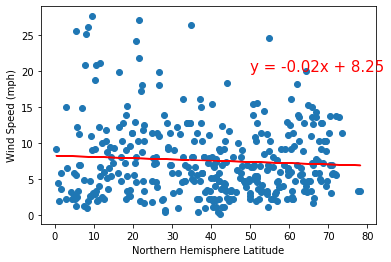

In [25]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = n_hemi["Lat"]
y_values = n_hemi["Wind Speed"]
reg, lin_eq, rvalue = lin_reg(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, reg, "r-")
plt.annotate(lin_eq,(50,20),fontsize= 15, color = "red")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-squared is: " + str(rvalue**2))
plt.savefig('output_data/N_Latitude_vs_WindSpeed')
plt.show()

The r-squared is: 1.414507142297234e-05


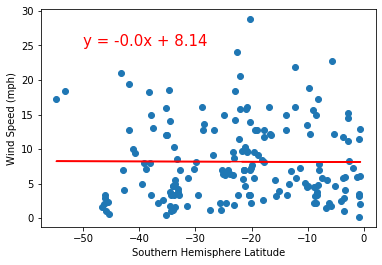

In [26]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = s_hemi["Lat"]
y_values = s_hemi["Wind Speed"]
reg, lin_eq, rvalue = lin_reg(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, reg, "r-")
plt.annotate(lin_eq,(-50,25),fontsize= 15, color = "red")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-squared is: " + str(rvalue**2))
plt.savefig('output_data/S_Latitude_vs_WindSpeed')
plt.show()